<a href="https://colab.research.google.com/github/flee2-trinity/Deep-Learning-in-Sports-Result-Prediction-/blob/main/PBP1718GIDPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
DATA_PATH = '/content/gdrive/My Drive/2021 Fall/Thesis I'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import csv
filename = '/content/gdrive/My Drive/2021 Fall/Thesis I/Records/PBP1718GID.txt'
with open(filename, newline='') as f:
  reader = csv.reader(f)
  p1content = list(reader)

In [ ]:
from collections import defaultdict
groups = defaultdict(list)
"""
for o in allData:
    groups[o.GameID].append(o)

gList = list(groups.values())
"""

'\nfor o in allData:\n    groups[o.GameID].append(o)\n\ngList = list(groups.values())\n'

In [ ]:
print(len(p1content))
print(p1content[200:300])
for t in range(len(p1content)):
  s = p1content[t][0].split()
  if len(s) >= 4 :
    #print(t)
    #(str(label)+" "+ str(period) + " " + str(tm)+ " " + str(abs(diff))+  " " + str(gID)+ " " + str(dayC) + "\n")
    if int(s[1])> 0:
      groups[int(s[4])].append((float(s[0]), int(s[1]), int(s[2]), float(s[3]), int(s[5])))
gList = list(groups.values())

168715
[['1 3 675 4 981541 120'], ['1 3 670 4 981541 120'], ['1 3 665 4 981541 120'], ['1 3 660 4 981541 120'], ['1 3 657 2 981541 120'], ['1 3 637 4 981541 120'], ['1 3 618 4 981541 120'], ['1 3 610 2 981541 120'], ['1 3 610 4 981541 120'], ['1 3 601 2 981541 120'], ['1 3 590 1 981541 120'], ['1 3 562 1 981541 120'], ['1 3 558 1 981541 120'], ['1 3 558 2 981541 120'], ['1 3 558 2 981541 120'], ['1 3 541 2 981541 120'], ['1 3 527 2 981541 120'], ['1 3 505 0 981541 120'], ['1 3 499 0 981541 120'], ['1 3 484 2 981541 120'], ['1 3 474 2 981541 120'], ['1 3 472 2 981541 120'], ['1 3 472 2 981541 120'], ['1 3 468 2 981541 120'], ['1 3 467 0 981541 120'], ['1 3 446 0 981541 120'], ['1 3 437 0 981541 120'], ['1 3 423 2 981541 120'], ['1 3 399 2 981541 120'], ['1 3 387 5 981541 120'], ['1 3 365 3 981541 120'], ['1 3 353 6 981541 120'], ['1 3 331 6 981541 120'], ['1 3 320 6 981541 120'], ['1 3 311 6 981541 120'], ['1 3 311 6 981541 120'], ['1 3 311 6 981541 120'], ['1 3 311 6 981541 120'], ['1 

In [ ]:
xList = [i for i in range(1, 97)]
print(len(gList))
newL1 = []
newL2 = []
for gl in gList:
  y1List = [[]for i in range(97)]
  y2List = [[]for i in range(97)]
  for g in gl:

    t = int((int(g[1])-1)*24 + (720-int(g[2]))/30)
    y1List[t].append(g[0])
    y2List[t].append(g[3])
    
  newL1.append(y1List)
  newL2.append(y2List)

248


In [ ]:
from statistics import mean
meany1 = []
meany2 = []
for yL in newL1:
  tempL = list(map(lambda x: mean(x) if len(x) > 0 else -1, yL[:96]))
  meany1.append(tempL)
for yL in newL2:
  tempL = list(map(lambda x: mean(x) if len(x) > 0 else -1, yL[:96]))
  meany2.append(tempL)
y1ListM = []
y2ListM = []
e = 0
for i in range(96):
  q = 0.0
  total = 0.0
  for x in meany1:
    if x[i] >= 0:
      q += 1
      total += x[i]
    else:
      e += 1
  y1ListM.append(total/q)
for i in range(96):
  q = 0.0
  total = 0.0
  for x in meany2:
    if x[i] >= 0:
      q += 1
      total += x[i]
  y2ListM.append(total/q)
    
print(e)
print(y1ListM)

142
[0.6490778688524591, 0.645651117589893, 0.645340136054422, 0.6418715846994536, 0.6358037340619307, 0.6447254616132168, 0.6521234207968901, 0.6434110787172013, 0.6367039295392952, 0.6384436701509872, 0.6369684798038457, 0.6317312937739767, 0.6322453161592506, 0.6371349059104162, 0.6358959919935531, 0.6407278358497871, 0.6424796747967481, 0.6384210865918182, 0.6487256420183249, 0.6538811459543168, 0.6485288424312816, 0.6524220867208672, 0.6524214447683835, 0.6509146341463413, 0.6661224489795919, 0.662385811467444, 0.6481524742195474, 0.6537650019357336, 0.6476238869531551, 0.6415846511764879, 0.644229094076655, 0.6412698412698412, 0.6450999293104557, 0.6419895893580103, 0.6379048582995951, 0.6428866455182245, 0.6423342739132213, 0.6455905430601787, 0.643028024606972, 0.6421183378500451, 0.647320223636013, 0.6499614420667053, 0.6519327164064005, 0.6581646423751688, 0.6498144399460187, 0.6571862348178138, 0.6635162601626015, 0.6631096973202236, 0.6709688346883468, 0.6650134952766532, 0

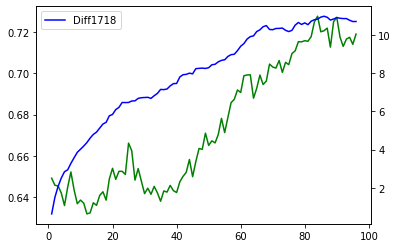

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(xList, y1ListM, label = "Accuracy", color='green')
ax_right.plot(xList, y2ListM, label = "Diff1718", color='blue')
plt.legend()
plt.show()